# Classification and Numeric Prediction

---

## Part 1: Classification

This data set contains information of cars purchased at the Auction.
<br>
We will use this file to predict the quality of buying decisions and visualize decision processes.
<br>
<br>
VARIABLE DESCRIPTIONS:<br>
Auction: Auction provider at which the  vehicle was purchased<br>
Color: Vehicle Color<br>
IsBadBuy: Identifies if the kicked vehicle was an avoidable purchase<br>
MMRCurrentAuctionAveragePrice: Acquisition price for this vehicle in average condition as of current day<br>
Size: The size category of the vehicle (Compact, SUV, etc.)<br>
TopThreeAmericanName:Identifies if the manufacturer is one of the top three American manufacturers<br>
VehBCost: Acquisition cost paid for the vehicle at time of purchase<br>
VehicleAge: The Years elapsed since the manufacturer's year<br>
VehOdo: The vehicles odometer reading<br>
WarrantyCost: Warranty price (term=36month  and millage=36K)<br>
WheelType: The vehicle wheel type description (Alloy, Covers)<br>
<br>
Target variable: **IsBadBuy**

###1. Upload and clean data

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report

In [ ]:
# Read data
carAuction = pd.read_csv("/content/drive/MyDrive/DL_data/carAuction.csv")
carAuction

,Auction,Color,IsBadBuy,MMRCurrentAuctionAveragePrice,Size,TopThreeAmericanName,VehBCost,VehicleAge,VehOdo,WarrantyCost,WheelType
0,ADESA,WHITE,No,2871,LARGE TRUCK,FORD,5300,8,75419,869,Alloy
1,ADESA,GOLD,Yes,1840,VAN,FORD,3600,8,82944,2322,Alloy
2,ADESA,RED,No,8931,SMALL SUV,CHRYSLER,7500,4,57338,588,Alloy
3,ADESA,GOLD,No,8320,CROSSOVER,FORD,8500,5,55909,1169,Alloy
4,ADESA,GREY,No,11520,LARGE TRUCK,FORD,10100,5,86702,853,Alloy
...,...,...,...,...,...,...,...,...,...,...,...
9995,ADESA,RED,No,7536,SMALL SUV,CHRYSLER,6600,4,85377,983,Alloy
9996,ADESA,BLACK,No,4921,LARGE TRUCK,GM,7000,7,89665,1543,Alloy
9997,ADESA,BLACK,No,9263,MEDIUM SUV,CHRYSLER,9000,4,59383,1417,Alloy
9998,ADESA,BLUE,No,3240,MEDIUM,OTHER,5500,4,48642,482,Covers


In [ ]:
# Show the head rows of a data frame
carAuction.head()

,Auction,Color,IsBadBuy,MMRCurrentAuctionAveragePrice,Size,TopThreeAmericanName,VehBCost,VehicleAge,VehOdo,WarrantyCost,WheelType
0,ADESA,WHITE,No,2871,LARGE TRUCK,FORD,5300,8,75419,869,Alloy
1,ADESA,GOLD,Yes,1840,VAN,FORD,3600,8,82944,2322,Alloy
2,ADESA,RED,No,8931,SMALL SUV,CHRYSLER,7500,4,57338,588,Alloy
3,ADESA,GOLD,No,8320,CROSSOVER,FORD,8500,5,55909,1169,Alloy
4,ADESA,GREY,No,11520,LARGE TRUCK,FORD,10100,5,86702,853,Alloy


In [ ]:
# Examine variable type
carAuction.dtypes

Auction                          object
Color                            object
IsBadBuy                         object
MMRCurrentAuctionAveragePrice     int64
Size                             object
TopThreeAmericanName             object
VehBCost                          int64
VehicleAge                        int64
VehOdo                            int64
WarrantyCost                      int64
WheelType                        object
dtype: object

In [ ]:
# Change categorical variables to "category"
carAuction['Auction'] = carAuction['Auction'].astype('category')
carAuction['Color'] = carAuction['Color'].astype('category')
carAuction['IsBadBuy'] = carAuction['IsBadBuy'].astype('category')
carAuction['Size'] = carAuction['Size'].astype('category')
carAuction['TopThreeAmericanName'] = carAuction['TopThreeAmericanName'].astype('category')
carAuction['WheelType'] = carAuction['WheelType'].astype('category')

In [ ]:
# Examine variable type
carAuction.dtypes

Auction                          category
Color                            category
IsBadBuy                         category
MMRCurrentAuctionAveragePrice       int64
Size                             category
TopThreeAmericanName             category
VehBCost                            int64
VehicleAge                          int64
VehOdo                              int64
WarrantyCost                        int64
WheelType                        category
dtype: object

###2. Partition the data set for Decision Tree model

In [ ]:
# Create dummy variables
carAuction = pd.get_dummies(carAuction, columns=['Auction','Color','Size','TopThreeAmericanName','WheelType'], drop_first=True)
carAuction

,IsBadBuy,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost,Auction_MANHEIM,Auction_OTHER,Color_BLACK,Color_BLUE,...,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,WheelType_Covers,WheelType_Special,WheelType_unkwnWheel
0,No,2871,5300,8,75419,869,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Yes,1840,3600,8,82944,2322,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,No,8931,7500,4,57338,588,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,No,8320,8500,5,55909,1169,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,No,11520,10100,5,86702,853,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,No,7536,6600,4,85377,983,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,No,4921,7000,7,89665,1543,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
9997,No,9263,9000,4,59383,1417,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9998,No,3240,5500,4,48642,482,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0


In [ ]:
# Partition the data to training and testing set
target = carAuction['IsBadBuy']
predictors = carAuction.drop(['IsBadBuy'], axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size = 0.3, random_state = 0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(7000, 39) (3000, 39) (7000,) (3000,)


In [ ]:
# Examine the porportion of target variable for training data set
print(target_train.value_counts(normalize=True))


No     0.869571
Yes    0.130429
Name: IsBadBuy, dtype: float64


In [ ]:
# Examine the porportion of target variable for testing data set
print(target_test.value_counts(normalize=True))


No     0.872667
Yes    0.127333
Name: IsBadBuy, dtype: float64


### 3. Decision Tree model prediction

In [ ]:
# Build a decision tree model on training data with max_depth = 2
model = DecisionTreeClassifier(criterion = 'entropy', random_state=1, max_depth=2)
model.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

[Text(0.5, 0.8333333333333334, 'WheelType_unkwnWheel <= 0.5\nentropy = 0.559\nsamples = 7000\nvalue = [6087, 913]\nclass = No'),
 Text(0.25, 0.5, 'VehicleAge <= 4.5\nentropy = 0.472\nsamples = 6686\nvalue = [6011, 675]\nclass = No'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.348\nsamples = 4064\nvalue = [3799, 265]\nclass = No'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.626\nsamples = 2622\nvalue = [2212, 410]\nclass = No'),
 Text(0.75, 0.5, 'Auction_MANHEIM <= 0.5\nentropy = 0.798\nsamples = 314\nvalue = [76, 238]\nclass = Yes'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.567\nsamples = 247\nvalue = [33, 214]\nclass = Yes'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.941\nsamples = 67\nvalue = [43, 24]\nclass = No')]

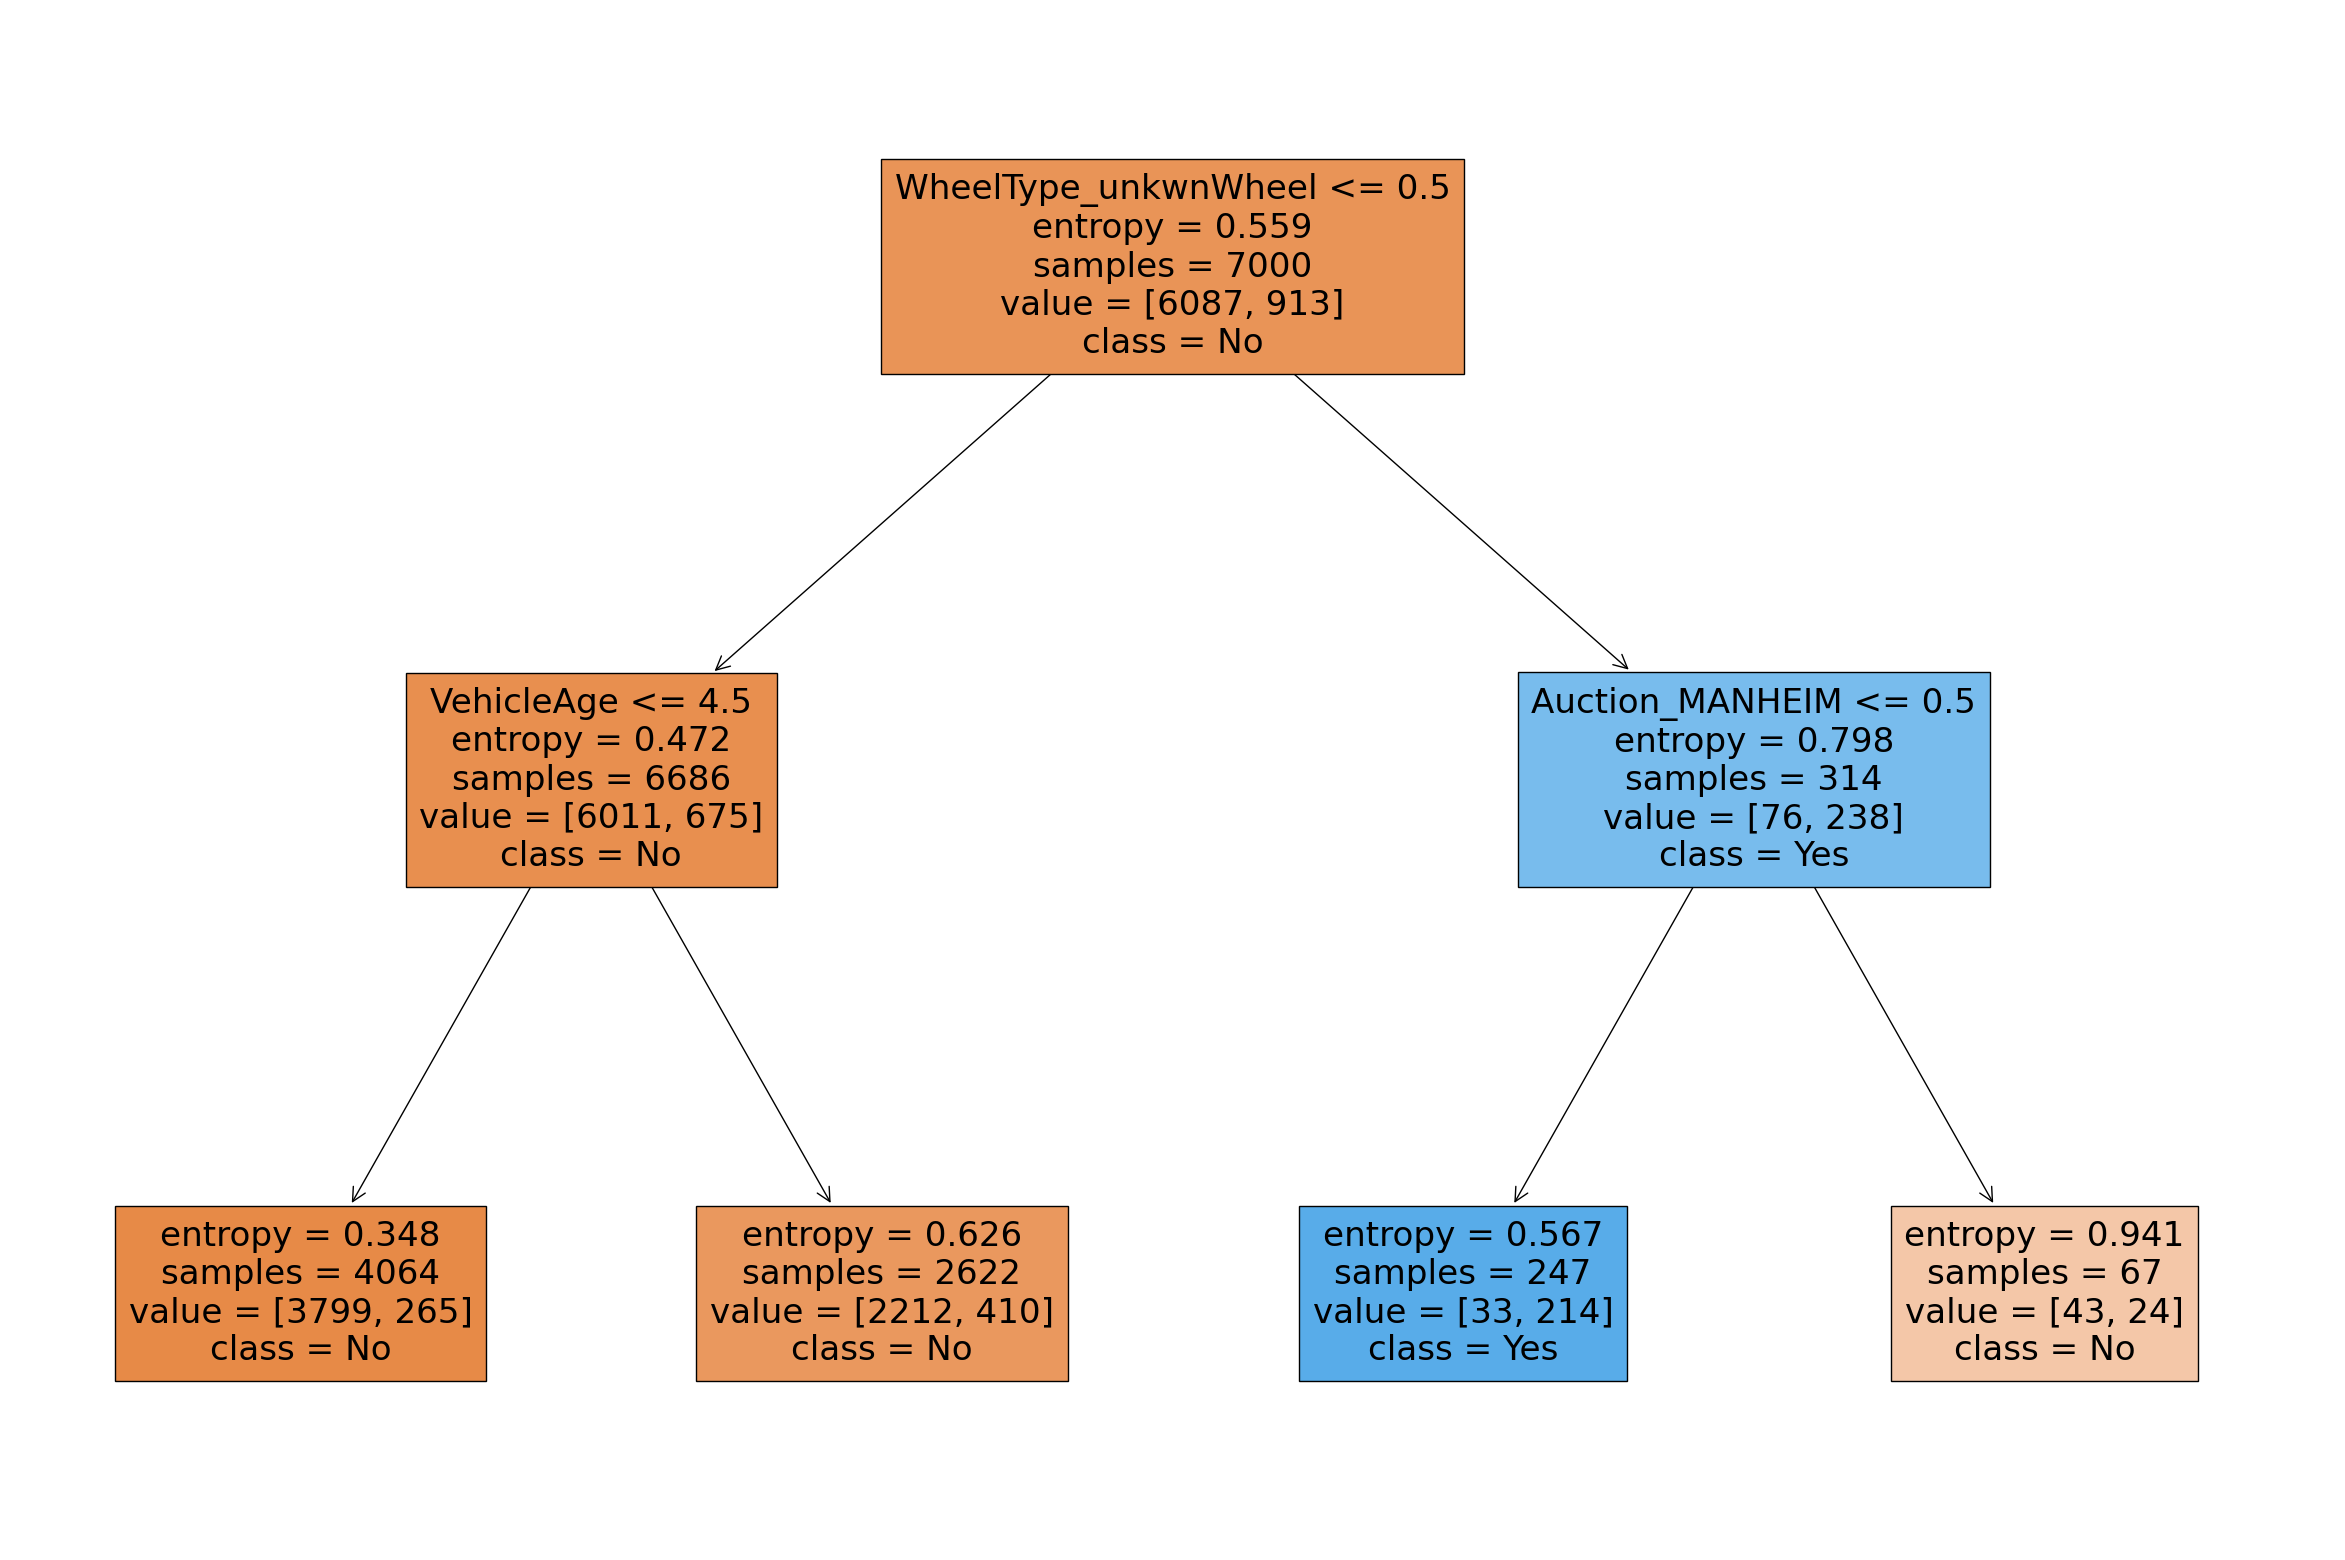

In [ ]:
# Plot the tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model, feature_names=list(predictors_train.columns), class_names=['No','Yes'], filled=True)


Q1. Find one path in the tree to a leaf node that is classified to IsBadBuy = 'Yes'. What is this path/rule's misclassification error rate?<br>
if WheelType =unkwnWheel, Auction!= MANHEIM, then IsBadBuy = yes
misclassification error rate:33/(33+214)

In [ ]:
# Make predictions on training and testing data
prediction_on_train = model.predict(predictors_train)
prediction_on_test = model.predict(predictors_test)


In [ ]:
# Examine the evaluation results on training data: accuracy, precision, recall, and f1-score
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

          No       0.90      0.99      0.94      6087
         Yes       0.87      0.23      0.37       913

    accuracy                           0.90      7000
   macro avg       0.88      0.61      0.66      7000
weighted avg       0.89      0.90      0.87      7000



In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.90      1.00      0.94      2618
         Yes       0.90      0.22      0.36       382

    accuracy                           0.90      3000
   macro avg       0.90      0.61      0.65      3000
weighted avg       0.90      0.90      0.87      3000



Q3. Does the decision tree model have better performance on majority (IsBadBuy = 'No') or minority class (IsBadBuy = 'Yes')? why? <br>



In [ ]:
# Build a decision tree model on training data with max_depth = 10
model2 = DecisionTreeClassifier(criterion = 'entropy', random_state=1, max_depth=10)
model2.fit(predictors_train, target_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1)

[Text(0.648342803030303, 0.9545454545454546, 'WheelType_unkwnWheel <= 0.5\nentropy = 0.559\nsamples = 7000\nvalue = [6087, 913]\nclass = No'),
 Text(0.36006944444444444, 0.8636363636363636, 'VehicleAge <= 4.5\nentropy = 0.472\nsamples = 6686\nvalue = [6011, 675]\nclass = No'),
 Text(0.15138888888888888, 0.7727272727272727, 'MMRCurrentAuctionAveragePrice <= 4767.0\nentropy = 0.348\nsamples = 4064\nvalue = [3799, 265]\nclass = No'),
 Text(0.08434343434343435, 0.6818181818181818, 'WarrantyCost <= 493.5\nentropy = 0.513\nsamples = 559\nvalue = [495, 64]\nclass = No'),
 Text(0.0803030303030303, 0.5909090909090909, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0]\nclass = No'),
 Text(0.08838383838383838, 0.5909090909090909, 'MMRCurrentAuctionAveragePrice <= 4695.5\nentropy = 0.536\nsamples = 523\nvalue = [459, 64]\nclass = No'),
 Text(0.0595959595959596, 0.5, 'TopThreeAmericanName_GM <= 0.5\nentropy = 0.498\nsamples = 485\nvalue = [432, 53]\nclass = No'),
 Text(0.030303030303030304, 0.409090909

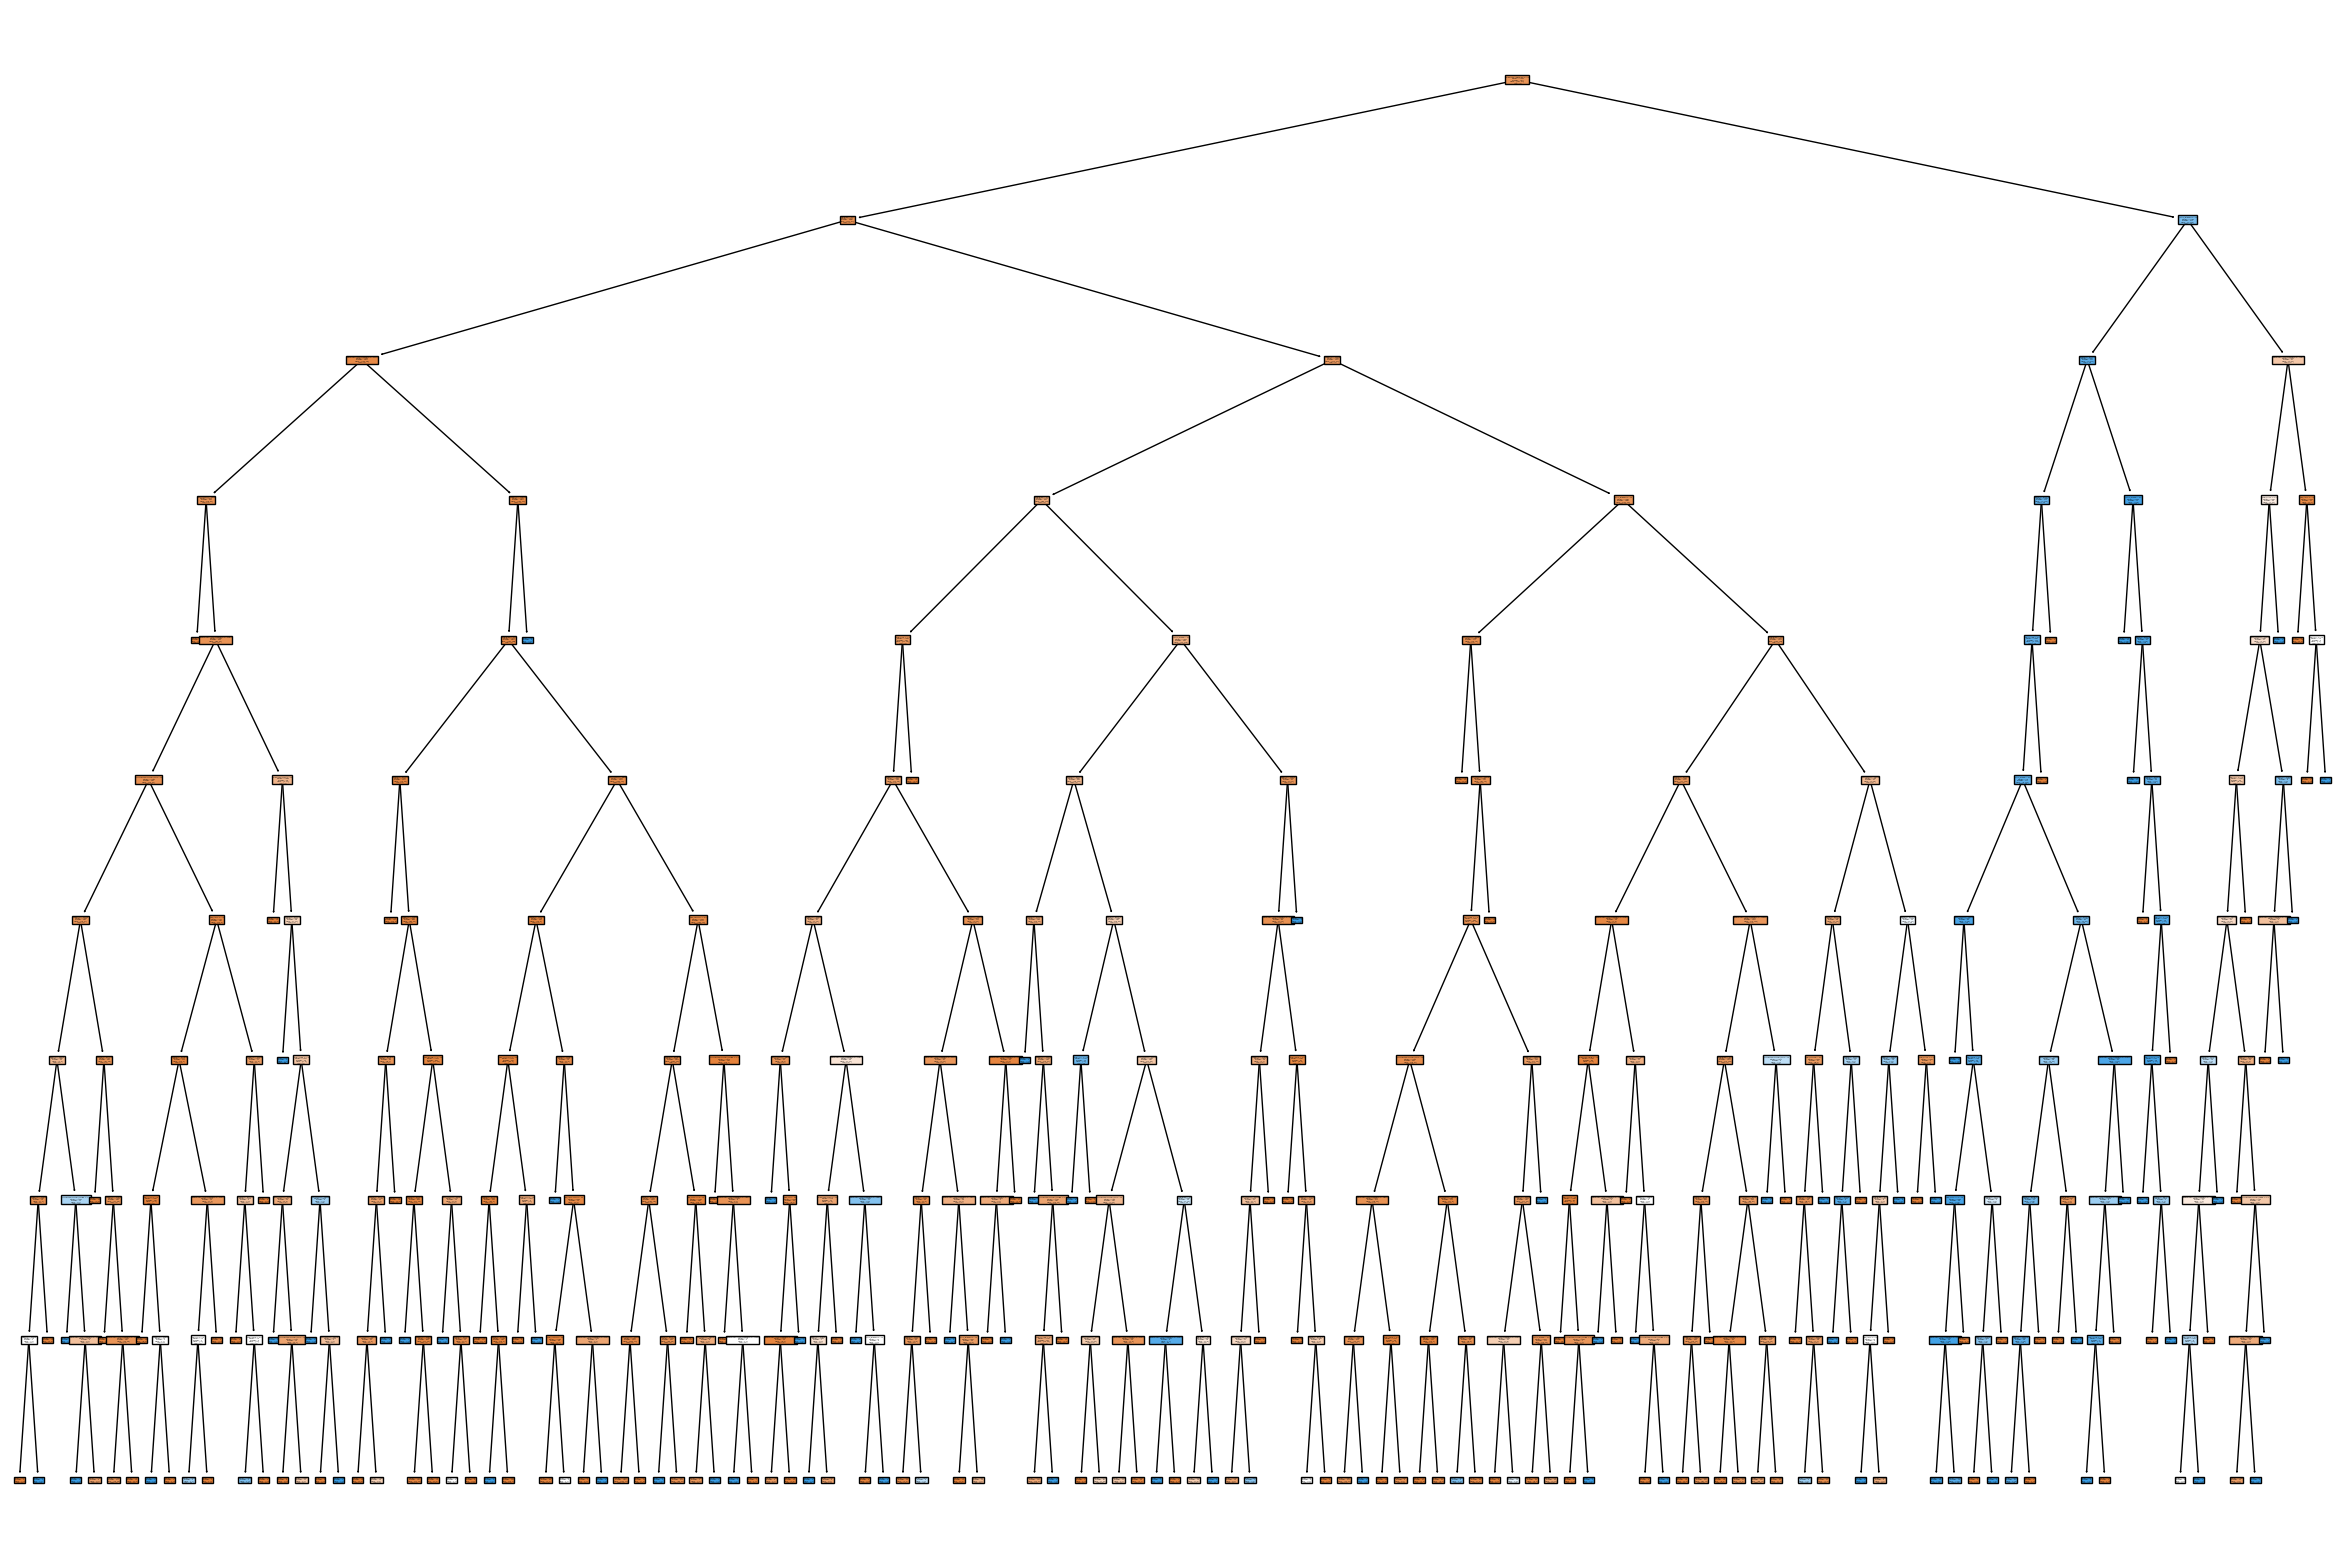

In [ ]:
# Plot the tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model2, feature_names=list(predictors_train.columns), class_names=['No','Yes'], filled=True)



In [ ]:
# Make predictions on training and testing data
prediction_on_train = model2.predict(predictors_train)
prediction_on_test = model2.predict(predictors_test)



In [ ]:
# Examine the evaluation results on training data: accuracy, precision, recall, and f1-score
print(classification_report(target_train, prediction_on_train))


              precision    recall  f1-score   support

          No       0.92      1.00      0.96      6087
         Yes       0.94      0.41      0.57       913

    accuracy                           0.92      7000
   macro avg       0.93      0.70      0.76      7000
weighted avg       0.92      0.92      0.90      7000



In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))


              precision    recall  f1-score   support

          No       0.90      0.97      0.93      2618
         Yes       0.56      0.25      0.35       382

    accuracy                           0.88      3000
   macro avg       0.73      0.61      0.64      3000
weighted avg       0.86      0.88      0.86      3000



## Part 2: Numeric Prediction

---

In order for a health insurance company to make money, it needs to collect more
in yearly premiums than it spends on medical care to its beneficiaries. As a result, insurers invest a great deal of time and money in developing models that accurately forecast medical expenses for the insured population.<br>
<br>
Medical expenses are difficult to estimate because the most costly conditions are rare and seemingly random. Still, some conditions are more prevalent for certain segments of the population. For instance, lung cancer is more likely among smokers than non-smokers, and heart disease may be more likely among the obese.<br>
<br>
The goal of this analysis is to use patient data to estimate the average medical
care expenses for such population segments. These estimates can be used to create actuarial tables that set the price of yearly premiums higher or lower,
depending on the expected treatment costs.<br>
<br>
The insurance data set has 1338 observations of 7 variables.
<br>
We will use this file to predict the medical expenses.
<br>
<br>
VARIABLE DESCRIPTIONS:<br>
age:	      age in years<br>
sex:	      gender<br>
bmi:	      body mass index<br>
children:	how many children do they have?<br>
smoker:	  do they smoke?<br>
region:	  geographic region<br>
expenses:	yearly medical expenses<br>
<br>
Target variable: **expenses**

### Upload and clean data

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Read data
insurance = pd.read_csv("/content/drive/MyDrive/DL_data/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
# Show the head rows of a data frame
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
# Examine variable type
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [ ]:
# Change categorical variables to "category"
insurance['sex'] = insurance['sex'].astype('category')
insurance['smoker'] = insurance['smoker'].astype('category')
insurance['region'] = insurance['region'].astype('category')

In [ ]:
# Examine variable type
insurance.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
expenses     float64
dtype: object

Text(0.5, 1.0, 'Histogram of expenses in the insurance data set')

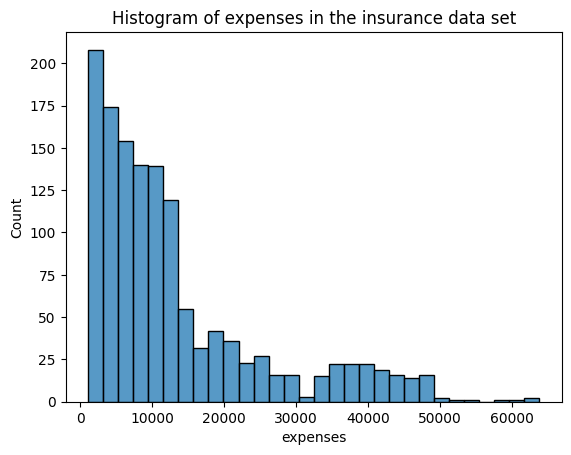

In [ ]:
# Data exploration: some examples
# Histogram of insurance expenses
snsplot = sns.histplot(x='expenses', data = insurance)
snsplot.set_title("Histogram of expenses in the insurance data set")

In [ ]:
# exploring relationships among all numeric variables: correlation matrix
insurance.corr()

<ipython-input-184-9c907da322db>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  insurance.corr()


,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


### Partition the data set for regression model

In [ ]:
# Create dummy variables
insurance = pd.get_dummies(insurance, columns=['sex','smoker','region'], drop_first=True)
insurance


,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,1,0,0
1334,18,31.9,0,2205.98,0,0,0,0,0
1335,18,36.9,0,1629.83,0,0,0,1,0
1336,21,25.8,0,2007.95,0,0,0,0,1


In [ ]:
# Partition the data
target = insurance['expenses']
predictors = insurance.drop(['expenses'], axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size = 0.3, random_state = 0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)


(936, 8) (402, 8) (936,) (402,)


Text(0.5, 1.0, 'Histogram of expenses in the training data set')

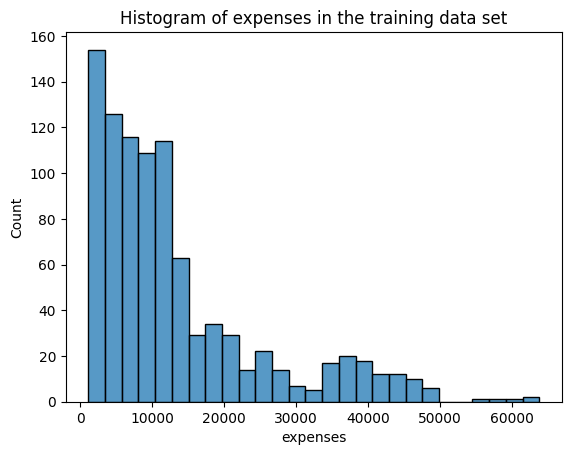

In [ ]:
# Examine the distribution of target variable for training data set
snsplot = sns.histplot(data = target_train)
snsplot.set_title("Histogram of expenses in the training data set")


Text(0.5, 1.0, 'Histogram of expenses in the testing data set')

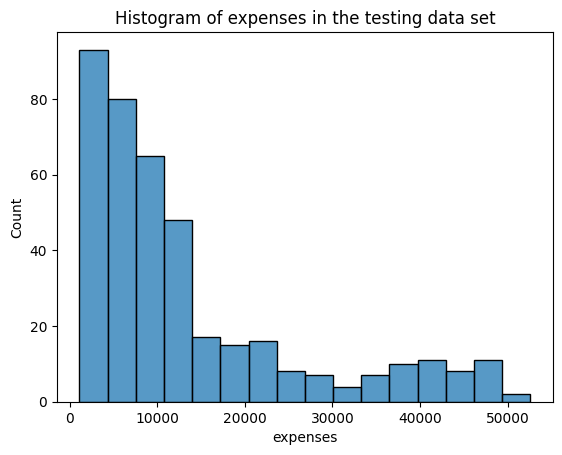

In [ ]:
# Examine the distribution of target variable for testing data set
snsplot = sns.histplot(data = target_test)
snsplot.set_title("Histogram of expenses in the testing data set")



### Multiple linear regression

In [ ]:
# Build a multiple linear regression model with all predictors
model = linear_model.LinearRegression()
model.fit(predictors_train, target_train)
model.score(predictors_train, target_train)

0.7309599963260364

In [ ]:
# Build a multiple linear regression model with all predictors
model.fit(predictors_test, target_test)
model.score(predictors_test, target_test)

0.7946011723345905

Q4. How the expenses change when we increase the bmi by 1? <br>
The new bmi estimate would increase by $335.


In [ ]:
# Make predictions on training and testing data
prediction_on_train = model.predict(predictors_train)
prediction_on_test = model.predict(predictors_test)


In [ ]:
# Examine the evaluation results on training data: MAE and RMSE
MAE = mean_absolute_error(target_train, prediction_on_train)
RMSE = mean_squared_error(target_train, prediction_on_train, squared=False)
print("MAE: ", MAE)
print("RMSE: ", RMSE)


MAE:  4255.425143275632
RMSE:  6208.868186635093


In [ ]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE: ", MAE)
print("RMSE: ", RMSE)

MAE:  3956.0631281113765
RMSE:  5723.184545692743


In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/DL_lab/Lab2_Classification_and_Numeric_Prediction.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/DL_lab/Lab2_Classification_and_Numeric_Prediction.ipynb to html
[NbConvertApp] Writing 1649387 bytes to /content/drive/MyDrive/DL_lab/Lab2_Classification_and_Numeric_Prediction.html
